In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['figure.dpi'] = 100

In [3]:
with open("../simulationData/sat_10YearGeoOrbit_1671986735220.txt") as f:
    lines = f.readline()

nSateliteDataPieces = 7

data = lines.split(",")

nTimesteps = int(len(data)/nSateliteDataPieces)

oneDayInSeconds = 60*60*24

oneYearInSeconds = oneDayInSeconds * 365

x = []
y = []
z = []
vx = []
vy = []
vz = []
t = []

firstDayI = -1;
firstYearI = -1;

for i in tqdm(range(nTimesteps)):

    # if (i % 10 == 0):
    stride = i * nSateliteDataPieces
    x.append(float(data[stride + 0]))
    y.append(float(data[stride + 1]))
    z.append(float(data[stride + 2]))
    vx.append(float(data[stride + 3]))
    vy.append(float(data[stride + 4]))
    vz.append(float(data[stride + 5]))
    t.append(float(data[stride + 6]))
    if (firstDayI == -1 and t[-1] >= oneDayInSeconds):
        firstDayI = i
        print("firstdayI set to: " + str(i));
    if (firstYearI == -1 and t[-1] >= oneYearInSeconds):
        firstYearI = i

  2%|▏         | 57916/3153600 [00:00<00:10, 290275.48it/s]

firstdayI set to: 864


100%|██████████| 3153600/3153600 [00:10<00:00, 313264.69it/s]


In [1]:
print(firstDayI)
plt.xlabel("z position of satellite (m)")
plt.ylabel("x position of satellite (m)")
xFirstDay = x[:firstDayI]
yFirstDay = y[:firstDayI]
plt.plot(xFirstDay[::1],yFirstDay[::1])
plt.tight_layout()
# plt.axis('scaled')
plt.show()


NameError: name 'firstDayI' is not defined

In [58]:
#calculate error of orbit from difference from geoorbit value

correctR = 42238377.70930382

error = [];
yearlyError = [];

for i in tqdm(range(len(t))):
    xi = x[i];
    yi = y[i];
    zi = z[i];
    r = np.sqrt(xi*xi + yi*yi + zi*zi)

    errori = (abs(r-correctR)/correctR) * 100;
    error.append(errori)

    if (i !=0 and i % firstYearI == 0 ):
        yearlyError.append(sum(error)/firstYearI)
        error = []

years = [];

for i in range(len(yearlyError)):
    years.append(i+1)

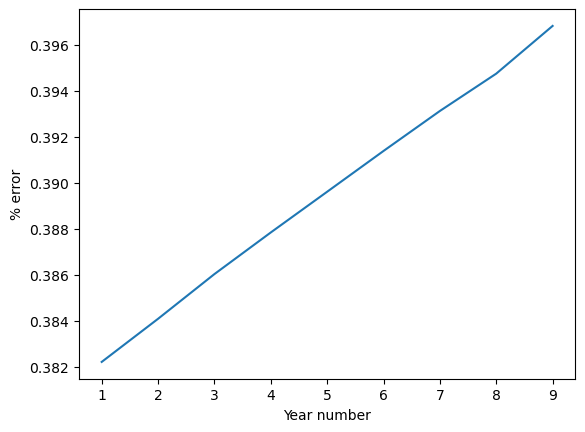

In [59]:
plt.ylabel("% error")
plt.xlabel("Year number")
plt.plot(years, yearlyError)

In [76]:
#calculate kepler values
from orbitFunctions import calculateKeplerElements

e = []
a = []
inclination = []
Omega = []
omega = []
trueAnomaly = []

planetM = 5.972 * 10**24

for i in tqdm(range(len(t))):
    xi = x[i];
    yi = y[i];
    zi = z[i];

    vxi = vx[i];
    vyi = vy[i];
    vzi = vz[i];

    keplerElements = calculateKeplerElements(xi,yi,zi,vxi,vyi,vzi,planetM)

    e.append(keplerElements[0])
    a.append(keplerElements[1])
    inclination.append(keplerElements[2])
    Omega.append(keplerElements[3])
    omega.append(keplerElements[4])
    trueAnomaly.append(keplerElements[5])


  0%|          | 0/3153600 [00:00<?, ?it/s]/Users/fraser/Github/masters_project/python/orbitFunctions.py:61: RuntimeWarning: invalid value encountered in double_scalars
  Omega = np.arccos(n[0] / nMag) * rad2Deg
/Users/fraser/Github/masters_project/python/orbitFunctions.py:68: RuntimeWarning: invalid value encountered in double_scalars
  omega = np.arccos(ne / (nMag * e)) * rad2Deg
100%|██████████| 3153600/3153600 [01:04<00:00, 49143.38it/s]


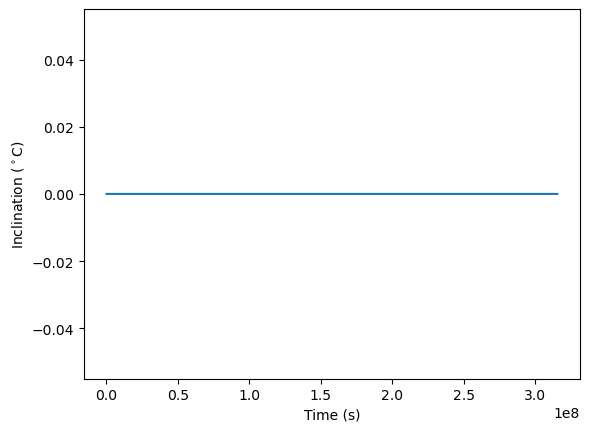

In [79]:
plt.xlabel("Time (s)")
plt.ylabel("Inclination ($^\circ$C)")
plt.plot(t,inclination);